In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from colorama import Fore, init
sns.set(style="whitegrid")

StatementMeta(practicaSpark, 1, 2, Finished, Available)

In [2]:
%%pyspark
df = spark.read.options(delimiter=",", header=True).csv('abfss://fs-synapse@datalakepabtor.dfs.core.windows.net/ingestdataexercise/apple-quality')
display(df.limit(10))

StatementMeta(practicaSpark, 1, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 9673df8b-d12a-430f-8b77-1ababd7fb3af)

In [3]:
df = df.toPandas()
df.info()

StatementMeta(practicaSpark, 1, 4, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   A_id         4000 non-null   object
 1   Size         4000 non-null   object
 2   Weight       4000 non-null   object
 3   Sweetness    4000 non-null   object
 4   Crunchiness  4000 non-null   object
 5   Juiciness    4000 non-null   object
 6   Ripeness     4000 non-null   object
 7   Acidity      4001 non-null   object
 8   Quality      4000 non-null   object
dtypes: object(9)
memory usage: 281.4+ KB


In [4]:
df.describe()

StatementMeta(practicaSpark, 1, 5, Finished, Available)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000,4000,4000,4000,4000,4000,4000,4001,4000
unique,4000,4000,4000,4000,4000,4000,4000,4001,2
top,0,-3.970048523,-2.512336381,5.346329613,-1.012008712,1.844900361,0.329839797,-0.491590483,good
freq,1,1,1,1,1,1,1,1,2004


In [5]:
df.isnull().sum()

StatementMeta(practicaSpark, 1, 6, Finished, Available)

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

StatementMeta(practicaSpark, 1, 7, Finished, Available)

A_id: 4001 distinct values
Size: 4001 distinct values
Weight: 4001 distinct values
Sweetness: 4001 distinct values
Crunchiness: 4001 distinct values
Juiciness: 4001 distinct values
Ripeness: 4001 distinct values
Acidity: 4001 distinct values
Quality: 3 distinct values


In [7]:
def clean_data(df):
    
    df = df.drop(columns=['A_id'])
    
    df = df.dropna()

    columns = df.columns[:-1] 
   
    df[columns] = df[columns].astype('float64')
    
    def label(Quality):
        """
        Transform based on the following examples:
        Quality    Output
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        return None
    
    df['Label'] = df['Quality'].apply(label)
    
    df = df.drop(columns=['Quality'])
    
    df = df.astype({'Label': 'int64'})
    
    return df

df_clean = clean_data(df)
df_clean.info()

StatementMeta(practicaSpark, 1, 8, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Label        4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


In [8]:
df_clean

StatementMeta(practicaSpark, 1, 9, Finished, Available)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0


StatementMeta(practicaSpark, 1, 12, Finished, Available)

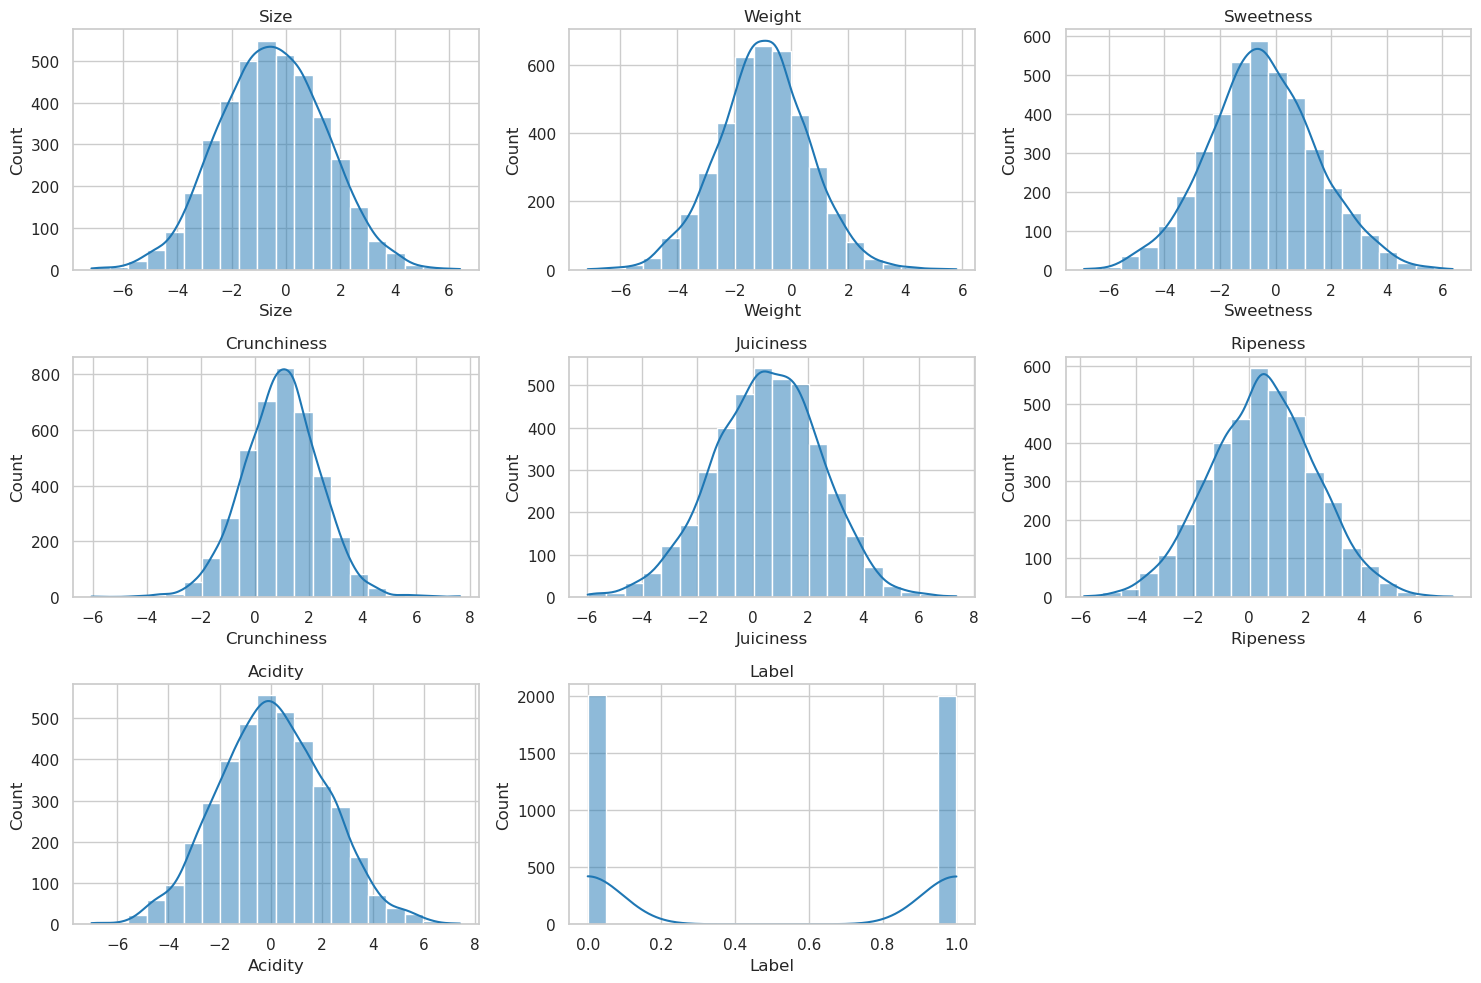

In [11]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Label']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_clean, x=column, kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

StatementMeta(practicaSpark, 1, 10, Finished, Available)

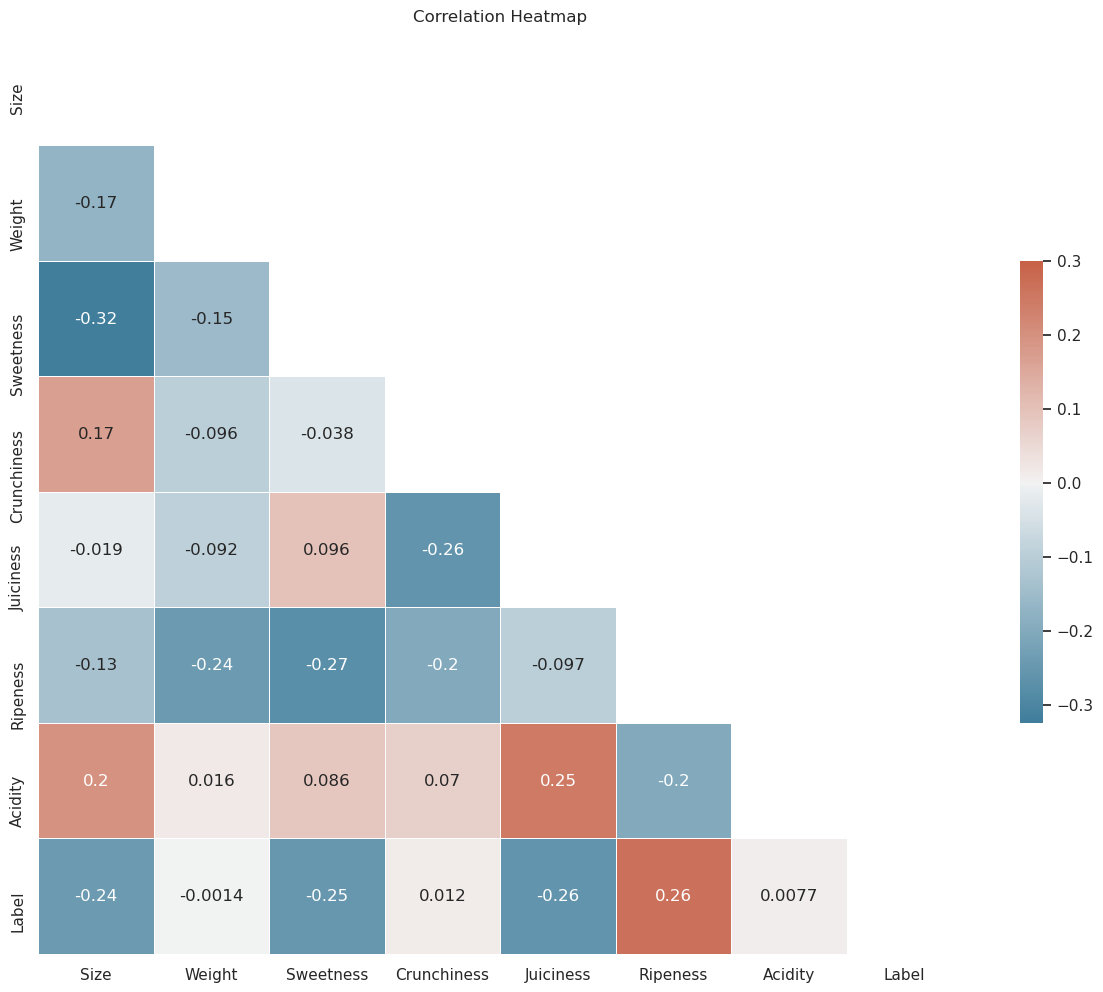

In [9]:
corr = df_clean.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

In [17]:
df_spark = spark.createDataFrame(df_clean)
df_spark.coalesce(1).write.format("csv").options(header="true", delimiter=",").mode("overwrite").save('abfss://fs-synapse@datalakepabtor.dfs.core.windows.net/ingestdataexercise/apple-quality-preprocessed')

StatementMeta(practicaSpark, 1, 18, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]
